In [2]:
import ujson as uj
import pandas as pd
%load_ext autoreload
%autoreload 2

In [3]:
file = '../dataset/power outlet.ndjson'

records = map(uj.loads, open(file, encoding='utf8'))
df = pd.DataFrame.from_records(records)

In [4]:
from utils import convert_many, convert_to_png, get_pixel_data

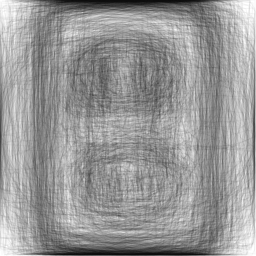

In [5]:
from IPython.display import Image, display

all_drawings = df[(df['recognized'] == True) & (df['countrycode'] == 'JP')]['drawing']
drawings = all_drawings if len(all_drawings) < 1000 else all_drawings.sample(1000)
display(Image(convert_many(drawings)))

In [21]:
sample_size = 1000
df2 = df.sample(sample_size)

df2['pixels'] = df2.apply(lambda row: get_pixel_data(row['drawing']), axis=1)

split_df = df2.pixels.apply(pd.Series).add_prefix('pixel')

result = pd.concat([df2.drop(columns=['pixels']), split_df], axis=1)

result


,word,countrycode,timestamp,recognized,key_id,drawing,pixel0,pixel1,pixel2,pixel3,...,pixel65526,pixel65527,pixel65528,pixel65529,pixel65530,pixel65531,pixel65532,pixel65533,pixel65534,pixel65535
153695,power outlet,US,2017-03-03 01:57:48.18516 UTC,True,6169584899981312,"[[[33, 33, 37, 37, 47, 52, 140, 170, 239, 255,...",1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
152165,power outlet,US,2017-03-09 18:23:40.53527 UTC,True,5759548365209600,"[[[199, 153, 123, 69, 53, 33, 23, 20, 13, 0, 1...",1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
81017,power outlet,US,2017-03-16 17:18:51.56032 UTC,True,5337006647279616,"[[[14, 11, 11, 0, 1, 7, 20, 50, 113, 212, 225,...",1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
55764,power outlet,BR,2017-01-25 22:06:34.23794 UTC,True,5909651839254528,"[[[101, 88, 63, 58, 56, 64, 64, 67, 88, 147, 1...",1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
157848,power outlet,SA,2017-03-11 16:42:55.57522 UTC,True,4531079471955968,"[[[143, 120, 57, 10, 1, 4, 0, 3, 69, 145, 138,...",1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23417,power outlet,US,2017-01-23 18:40:59.74117 UTC,True,5048130556919808,"[[[11, 11, 0, 0, 29, 113, 174, 181, 188, 191, ...",1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
84284,power outlet,US,2017-03-14 00:58:19.65633 UTC,True,6432068370169856,"[[[1, 1, 8, 7, 15, 38, 103, 160, 141, 138, 134...",1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
44431,power outlet,US,2017-03-29 21:27:53.04325 UTC,True,4546117914066944,"[[[17, 21, 22, 124, 166, 167, 161, 159, 158, 1...",1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
134584,power outlet,US,2017-03-17 12:15:48.74571 UTC,True,6192326835699712,"[[[18, 4, 3, 4, 23, 14, 15, 88, 213, 209, 198,...",1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
to_append.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 65536 entries, pixel0 to pixel65535
dtypes: object(65536)
memory usage: 0.0+ bytes
